In [31]:
import pandas as pd

In [32]:
df=pd.read_csv("spam2.csv")

In [33]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## data cleaning


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [35]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [38]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [40]:
df.sample(5)

,target,text
3893,spam,Dear Dave this is your final notice to collect...
3488,ham,I'm also came to room.
3886,ham,Cab is available.they pick up and drop at door...
4069,ham,Ok i wont call or disturb any one. I know all ...
4307,ham,Ha ha - had popped down to the loo when you he...


In [41]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [42]:
df['target']=encoder.fit_transform(df['target'])

In [43]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [44]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [47]:
#duplicate
df.duplicated().sum()

403

In [48]:
df=df.drop_duplicates(keep='first')

In [49]:
df.duplicated().sum()

0

## EDA (exploratory data analysis)

In [52]:
df.target.value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x21ebf8b6c90>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

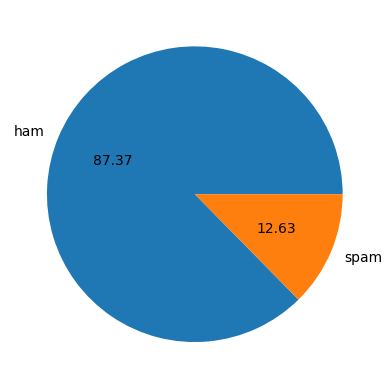

In [53]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")

In [54]:
import nltk

In [55]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gopal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [57]:
#no. of characters in a sms
df['num_char']=df['text'].apply(len)

C:\Users\gopal\AppData\Local\Temp\ipykernel_12920\4111586667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_char']=df['text'].apply(len)


In [58]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [60]:
#no. of words
df['no. of words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\gopal\AppData\Local\Temp\ipykernel_12920\2275502274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no. of words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [61]:
df.head()

,target,text,num_char,no. of words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [62]:
df['no. of sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\gopal\AppData\Local\Temp\ipykernel_12920\1017409860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no. of sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [63]:
df.head()

,target,text,num_char,no. of words,no. of sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [65]:
df[['num_char','no. of words','no. of sent']].describe()

,num_char,no. of words,no. of sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [66]:
#ham msgs
df[df['target']==0][['num_char','no. of words','no. of sent']].describe()

,num_char,no. of words,no. of sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [67]:
#for spam msgs
df[df['target']==1][['num_char','no. of words','no. of sent']].describe()

,num_char,no. of words,no. of sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [68]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

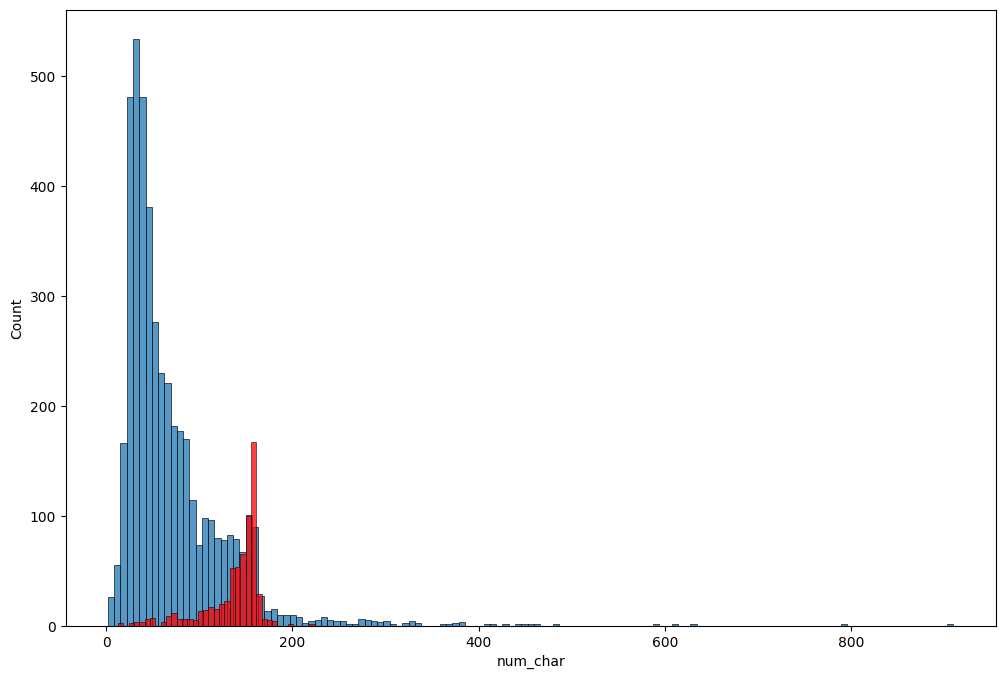

In [72]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')

C:\Users\gopal\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


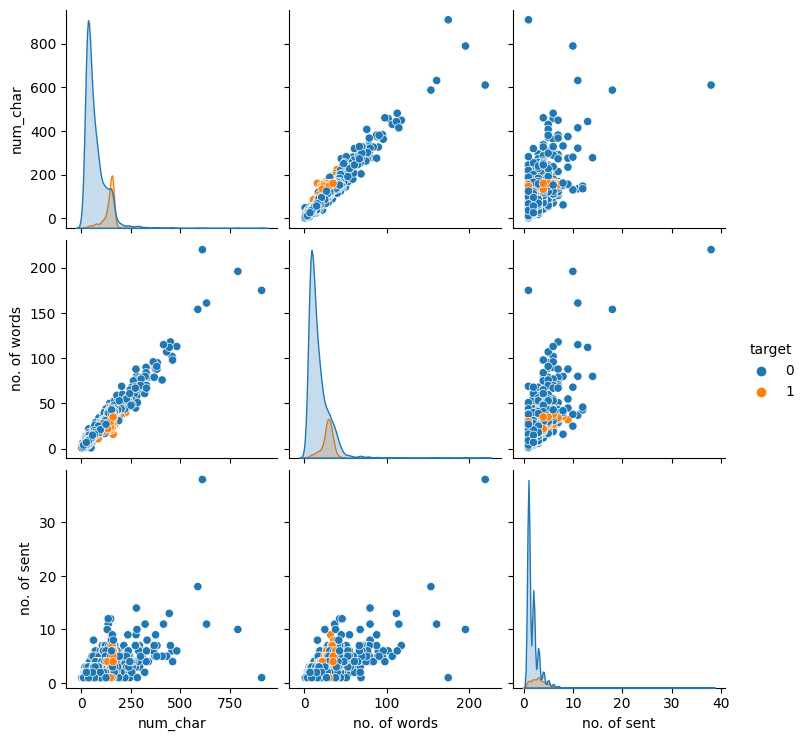

In [76]:
#relation between two 
sns.pairplot(df,hue='target')

## data preprocessing
###### lower case
###### tokenization
###### removing special characters
###### removing stop words and punctuation
###### stemming

In [92]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [95]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gopal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [96]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [210]:
transform_text("I love learning , how about You?")

'love learn'

In [100]:
df['transformed']=df['text'].apply(transform_text)

In [101]:
df.head()

,target,text,num_char,no. of words,no. of sent,transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [118]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=6,background_color='white')

In [119]:
spam_wc=wc.generate(df[df['target']==1]['transformed'].str.cat(sep=" "))

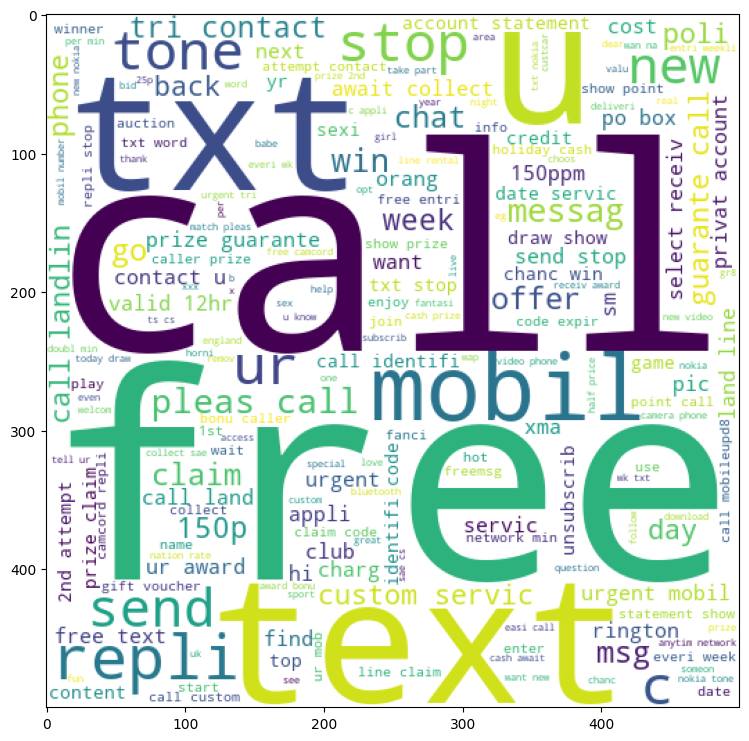

In [120]:
plt.figure(figsize=(15,9))
plt.imshow(spam_wc)

In [123]:
ham_wc=wc.generate(df[df['target']==0]['transformed'].str.cat(sep=" "))

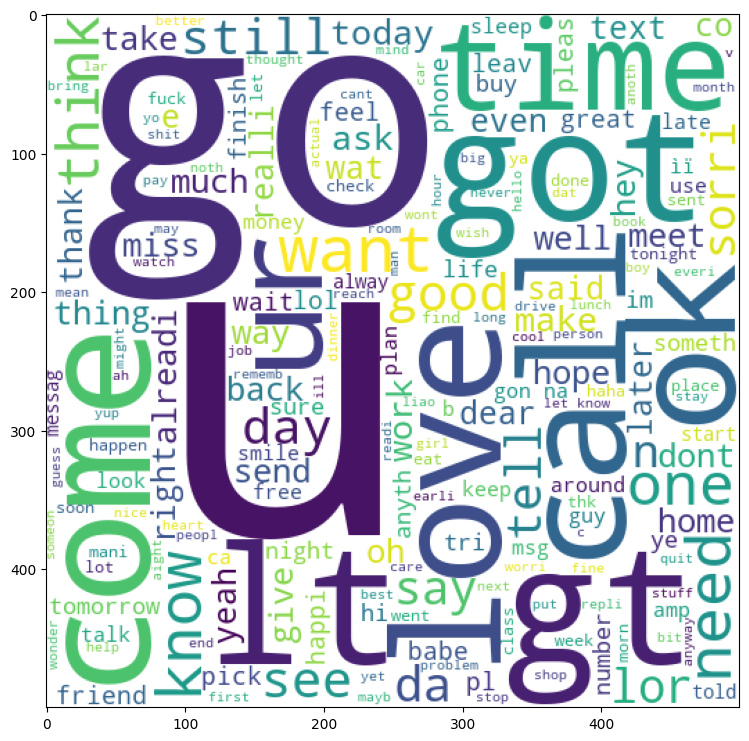

In [124]:
plt.figure(figsize=(15,9))
plt.imshow(spam_wc)

In [128]:
df[df['target']==1]['transformed']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: transformed, Length: 653, dtype: object

In [129]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    

In [130]:
len(spam_corpus)

9939

In [200]:
# from collections import Counter
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
# plt.xticks(rotation='vertical')
# plt.show()

## train model

In [182]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [183]:
x=tfidf.fit_transform(df['transformed']).toarray()

In [184]:
x.shape

(5169, 6708)

In [185]:
y=df['target'].values

In [186]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [189]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [190]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [199]:
# gnb.fit(x_train,y_train)
# y_pred1=gnb.predict(x_test)
# print(accuracy_score(y_test,y_pred1))
# print(confusion_matrix(y_test,y_pred1))
# print(precision_score(y_test,y_pred1))

In [196]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [201]:
y_pred2

array([0, 0, 0, ..., 0, 0, 0])

In [198]:
# bnb.fit(x_train,y_train)
# y_pred3=bnb.predict(x_test)
# print(accuracy_score(y_test,y_pred3))
# print(confusion_matrix(y_test,y_pred3))
# print(precision_score(y_test,y_pred3))

In [ ]:
#used tfidf and MultinomialNB

In [214]:
# import pickle
# pickle.dump(tfidf,open('vectorizer.pkl','wb'))
# pickle.dump(mnb,open('model.pkl','wb'))